<a href="https://colab.research.google.com/github/Nithun7023/titanic-predictor/blob/main/Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-3191272661.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1-3191272661.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Titanic Survival Predictor - Decision Tree Results
Accuracy : 0.8324
Precision: 0.8000
Recall   : 0.7536
F1 Score : 0.7761

Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.85      0.88      0.87       110
       Survived       0.80      0.75      0.78        69

       accuracy                           0.83       179
      macro avg       0.83      0.82      0.82       179
   weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[97 13]
 [17 52]]


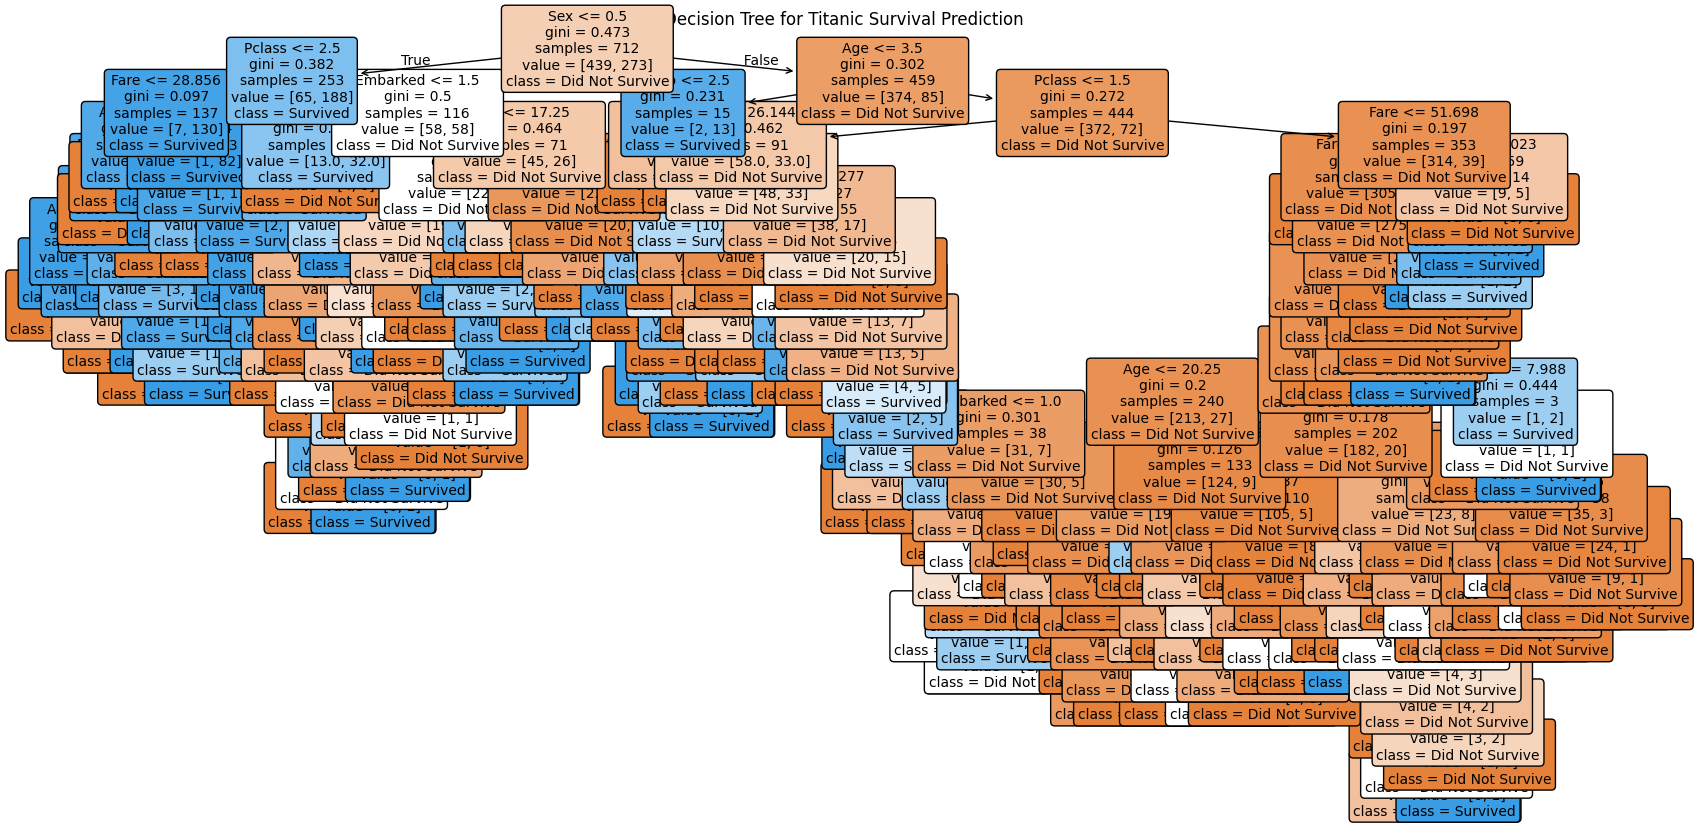

In [1]:
# Titanic Survival Predictor using Decision Tree Classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 2. Drop irrelevant or high-missing‐value columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 3. Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 4. Encode categorical columns
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# 6. Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 7. Initialize and train Decision Tree Classifier
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
model.fit(X_train, y_train)

# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Titanic Survival Predictor - Decision Tree Results")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 10. (Optional) Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Did Not Survive', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()